<h1> ARIMA </h1>

In [1]:
from __future__ import division
from ml_support import *
from statsmodels.tsa.seasonal import seasonal_decompose

%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 10.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

Populating the interactive namespace from numpy and matplotlib


<h1> Load in the data </h1>

In [2]:
DF = pd.read_csv('Malaria_Region_Level.csv', index_col=0)
DF.head()

,Real_Date,Indicator_id,val,Region,Indicator,gen_cat,age_cat,E_Date,E_year,E_month,...,ave_temp,ave_prec_mm,elevation_m,infection_rate,is_capital,net_frac,temp,prec_mm,RegionLat,RegionLon
0,2015-09-12,hmis_c_1_4_2_5_4,0.991171,harreri,Proportion of targeted HH covered with LLIN in...,-1,-1,2008-01-01,2008,1,...,19.5,791.2,1885,0.000004,0,0.991171,20.6,102.2,9.28966,42.172526
1,2014-07-08,hmis_indicator_3199,21.000000,harreri,Number of slides or RDT positive for malaria <...,1,1,2006-11-01,2006,11,...,19.5,791.2,1885,0.000091,0,0.991171,20.8,108.7,9.28966,42.172526
2,2014-08-07,hmis_indicator_3199,35.000000,harreri,Number of slides or RDT positive for malaria <...,1,1,2006-12-01,2006,12,...,19.5,791.2,1885,0.000151,0,0.991171,20.4,139.7,9.28966,42.172526
3,2014-09-11,hmis_indicator_3199,14.000000,harreri,Number of slides or RDT positive for malaria <...,1,1,2007-01-01,2007,1,...,19.5,791.2,1885,0.000060,0,0.991171,20.6,102.2,9.28966,42.172526
4,2014-10-11,hmis_indicator_3199,14.000000,harreri,Number of slides or RDT positive for malaria <...,1,1,2007-02-01,2007,2,...,19.5,791.2,1885,0.000060,0,0.991171,19.1,50.6,9.28966,42.172526


In [3]:
DF['Date'] = [pd.to_datetime(date) for date in DF['Real_Date']]

In [4]:
DF.groupby('Indicator').count().index

Index([u'Number of slides or RDT positive for malaria',
       u'Number of slides or RDT positive for malaria 5-14 years: Females',
       u'Number of slides or RDT positive for malaria 5-14 years: Males',
       u'Number of slides or RDT positive for malaria < 5 years: Females',
       u'Number of slides or RDT positive for malaria < 5 years: Males',
       u'Number of slides or RDT positive for malaria >=15 years: Females',
       u'Number of slides or RDT positive for malaria >=15 years: Males',
       u'Proportion of targeted HH covered with LLIN in the last 12 months',
       u'Total number of slides or RDT performed for malaria diagnosis'],
      dtype='object', name=u'Indicator')

In [5]:
pd.to_datetime("2015-09-12T00:00:00.000Z")

Timestamp('2015-09-12 00:00:00')

In [138]:
Z = {'a': ["2015-09-12T00:00:00.000Z", "2016-09-12T00:00:00.000Z"], 'b': ["2015-09-12T00:00:00.000Z", "2016-09-12T00:00:00.000Z"]}
ZZ = {'a': [1,3], 'b': [2,4] }

for field, values in ZZ.iteritems():
    ts = Z[field]
    print pd.DataFrame({'val': values, 'date': pd.to_datetime(ts)}).set_index('date')

            val
date           
2015-09-12    1
2016-09-12    3
            val
date           
2015-09-12    2
2016-09-12    4


In [144]:
df = pd.DataFrame({'val': values, 'date': pd.to_datetime(ts)}).set_index('date')
df

,val
date,
2015-09-12,2
2016-09-12,4


In [164]:
df.index.max()

Timestamp('2016-09-12 00:00:00')

In [149]:
aa = [1,2,3,4,5]

In [155]:
aa.insert(0, ts[0])
aa.append(ts[-1])

In [156]:
aa

['2015-09-12T00:00:00.000Z',
 '2015-09-12T00:00:00.000Z',
 '2015-09-12T00:00:00.000Z',
 1,
 2,
 3,
 4,
 5,
 '2016-09-12T00:00:00.000Z']

In [161]:
[0] + [1,2,3,4] +[5]

[0, 1, 2, 3, 4, 5]

<h1> Test with total cases </h1>

In [8]:
#indicator = 'Number of slides or RDT positive for malaria'
indicator = 'Number of slides or RDT positive for malaria 5-14 years: Females'

In [9]:
df_nation = DF[DF['Indicator'] == indicator].groupby('Date').sum()

In [31]:
df_nation.resample('M').sum().val.replace(np.nan, 0 )

Date
2014-06-30        6.0
2014-07-31    14450.0
2014-08-31    14525.0
2014-09-30    15616.0
2014-10-31    18967.0
2014-11-30    21643.0
2014-12-31    17347.0
2015-01-31    13170.0
2015-02-28    11066.0
2015-03-31    11110.0
2015-04-30    11086.0
2015-05-31    14500.0
2015-06-30    16387.0
2015-07-31    17373.0
2015-08-31    17597.0
2015-09-30    18517.0
2015-10-31    20804.0
2015-11-30    18827.0
2015-12-31    16220.0
2016-01-31    14541.0
2016-02-29    13345.0
2016-03-31    14513.0
2016-04-30    14960.0
2016-05-31    17877.0
2016-06-30    22111.0
2016-07-31    21209.0
2016-08-31    17464.0
2016-09-30    17719.0
2016-10-31    19830.0
2016-11-30    18652.0
Freq: M, Name: val, dtype: float64

In [34]:
nation_decomp = seasonal_decompose(df_nation.resample('M').sum().val.dropna(), model="addative")

In [173]:
nation_decomp.trend.replace(np.nan,0).interpolate(method='time', limit_direction='both')

Date
2014-06-30        0.000000
2014-07-31        0.000000
2014-08-31        0.000000
2014-09-30        0.000000
2014-10-31        0.000000
2014-11-30        0.000000
2014-12-31    14306.375000
2015-01-31    15110.708333
2015-02-28    15360.500000
2015-03-31    15609.375000
2015-04-30    15806.791667
2015-05-31    15766.000000
2015-06-30    15601.708333
2015-07-31    15611.875000
2015-08-31    15763.958333
2015-09-30    16000.708333
2015-10-31    16303.916667
2015-11-30    16606.041667
2015-12-31    16985.250000
2016-01-31    17383.583333
2016-02-29    17537.875000
2016-03-31    17499.083333
2016-04-30    17425.250000
2016-05-31    17377.375000
2016-06-30        0.000000
2016-07-31        0.000000
2016-08-31        0.000000
2016-09-30        0.000000
2016-10-31        0.000000
2016-11-30        0.000000
Freq: M, Name: val, dtype: float64

In [36]:
#import json
#json.dumps(nation_decomp.seasonal.values.tolist())
#json.dumps(nation_decomp.seasonal.index.strftime('%Y-%m-%d').tolist())

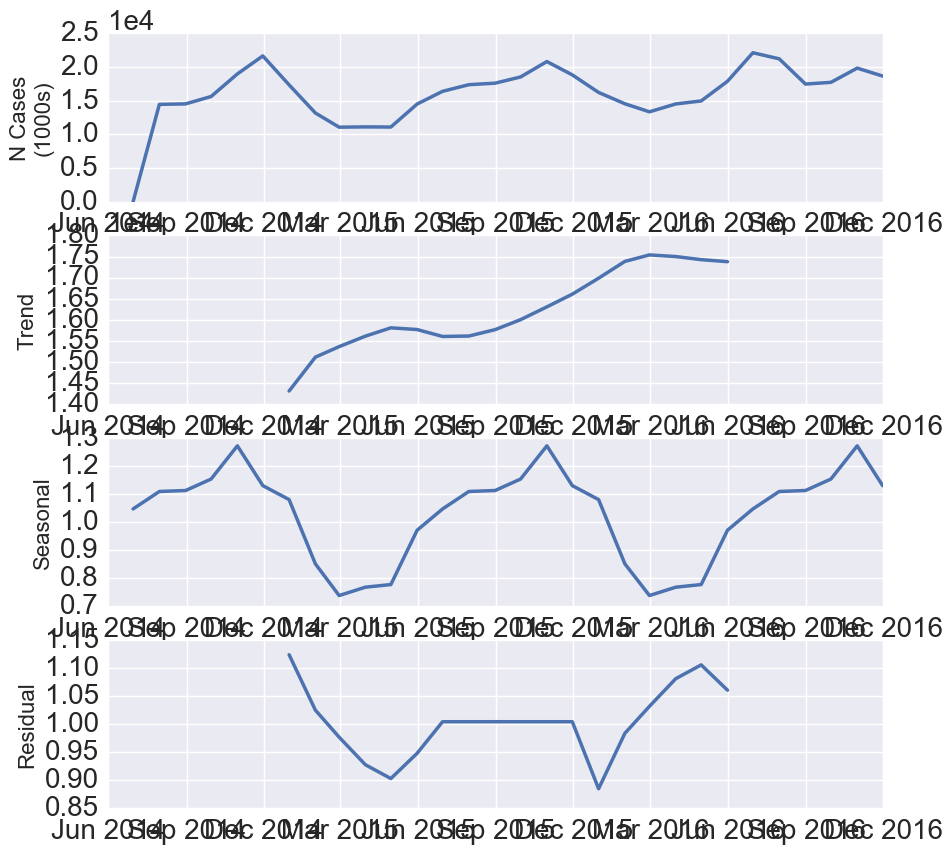

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)

legend_labels  = ['males', 'females']
legend_patches = ['#d8b365', '#2166ac']

fig.set_size_inches(10, 10)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax1.set_xlim([datetime.date(2014, 6, 1), datetime.date(2016, 12, 1)])
ax2.set_xlim([datetime.date(2014, 6, 1), datetime.date(2016, 12, 1)])
ax3.set_xlim([datetime.date(2014, 6, 1), datetime.date(2016, 12, 1)])
ax4.set_xlim([datetime.date(2014, 6, 1), datetime.date(2016, 12, 1)])

ax1.set_ylabel("N Cases\n(1000s)", fontsize = 16)
ax2.set_ylabel("Trend", fontsize = 16)
ax3.set_ylabel("Seasonal", fontsize = 16)
ax4.set_ylabel("Residual", fontsize = 16)


ax1.plot(nation_decomp.observed)
ax2.plot(nation_decomp.trend)
ax3.plot(nation_decomp.seasonal)
ax4.plot(nation_decomp.resid)

In [114]:
df_nation.resample('M').sum().val[1:]

Date
2014-07-31    14450.0
2014-08-31    14525.0
2014-09-30    15616.0
2014-10-31    18967.0
2014-11-30    21643.0
2014-12-31    17347.0
2015-01-31    13170.0
2015-02-28    11066.0
2015-03-31    11110.0
2015-04-30    11086.0
2015-05-31    14500.0
2015-06-30    16387.0
2015-07-31    17373.0
2015-08-31    17597.0
2015-09-30    18517.0
2015-10-31    20804.0
2015-11-30    18827.0
2015-12-31    16220.0
2016-01-31    14541.0
2016-02-29    13345.0
2016-03-31    14513.0
2016-04-30    14960.0
2016-05-31    17877.0
2016-06-30    22111.0
2016-07-31    21209.0
2016-08-31    17464.0
2016-09-30    17719.0
2016-10-31    19830.0
2016-11-30    18652.0
Freq: M, Name: val, dtype: float64

<h1> Forecast with ARIMA </h1>

In [129]:
import statsmodels.api as sm

ts = df_nation.resample('M').sum().val[1:].dropna()

num_pred = 12

arma_res = arima_model.ARIMA(ts, order=(2,1,2), freq='M').fit()
preds, stderr, ci = arma_res.forecast(num_pred)

rng = pd.date_range(ts.index[-1], periods=num_pred, freq='M')


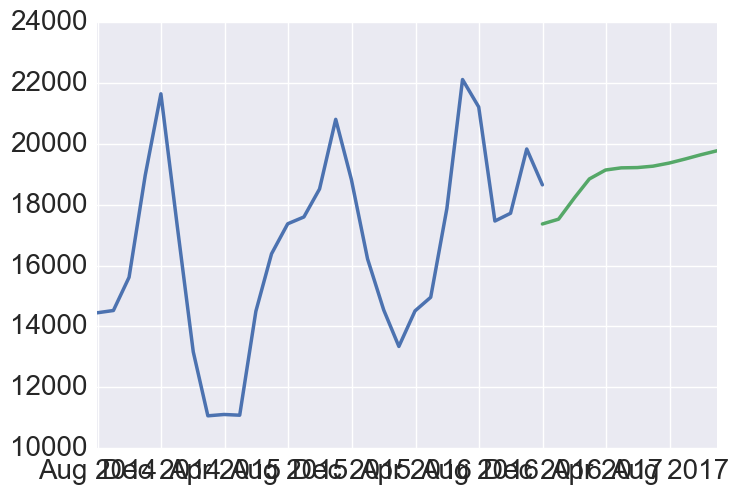

In [130]:
plt.plot(ts)
plt.plot(rng, preds)

In [99]:
preds

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan])